# Tecnológico de Estudios Superiores de Monterrey

# Ciencia y analítica de datos

# Equipo 57

# Integrantes:

Juan Carlos Villamil Rojas A01794003

Axel Alejandro Tlatoa Villavicencio A01363351


# Análisis de aguas subterráneas

In [171]:
import numpy as np
%matplotlib inline
import matplotlib
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from google.colab import drive
import warnings
import math
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from shapely.geometry import Point
import requests, zipfile
from io import BytesIO
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, Normalizer, StandardScaler
!pip install geopandas
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.preprocessing import label_binarize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
pd.set_option('display.max_columns', None)

In [87]:
data = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/actividades-de-aprendizaje-A01794003/main/PROYECTO/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding='latin1')


In [88]:
data.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [89]:
data.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [90]:
data.shape

(1068, 57)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

Existe una gran cantidad de variables de entrada de tipo *objeto* y en menor proporción datos numéricos de tipo *flotante*. La variable de entrada ***SDT_mg/L*** no posee ningún valor relevante, se procede a eliminar la columna:

In [92]:
data.isna().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_mg/L                 True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG

In [93]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


LONGITUD         -101.891007
LATITUD            23.163618
PERIODO          2020.000000
ALC_mg/L          235.633759
CONDUCT_mS/cm    1138.953013
SDT_mg/L                 NaN
dtype: float64

In [94]:
data.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [95]:
data.tail()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,231.045,Alta,2350.0,Dudosa para riego,NaN,1545.8,Cultivos con manejo especial,Ligeramente salobres,<0.2,Baja,752.096,Muy dura e indeseable usos industrial y domestico,<1.1,Potable - Excelente,14.615488,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"CONDUC,DT,NO3,",SI,NO,SI,SI,SI,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,256.000,Alta,529.0,Buena para riego,NaN,297,Excelente para riego,Potable - Dulce,<0.2,Baja,273,Potable - Dura,<1.1,Potable - Excelente,77.392,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,0.00709,Potable - Excelente,0.07578,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,330.690,Alta,2600.0,Dudosa para riego,NaN,1873,Cultivos con manejo especial,Ligeramente salobres,0.7574,Potable - Optima,660.2126,Muy dura e indeseable usos industrial y domestico,620,Aceptable,36.477104,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,0.0242,Potable - Excelente,0.2129,Potable - Excelente,Rojo,"CONDUC,DT,NO3,",SI,NO,SI,SI,SI,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,193.140,Alta,873.0,Permisible para riego,NaN,690.6667,Cultivos sensibles,Potable - Dulce,0.7108,Potable - Optima,406.368,Potable - Dura,<1.1,Potable - Excelente,<0.02,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,0.012,Potable - Excelente,0.1786,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1067,OCRBR5109M1,COMUNIDAD LA REFORMA,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.73302,25.09380,2020,263.070,Alta,817.0,Permisible para riego,NaN,495,Excelente para riego,Potable - Dulce,0.4002,Media,362.544,Potable - Dura,<1.1,Potable - Excelente,0.811876,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [96]:
data.size

60876

In [97]:
data.columns.shape

(57,)

Existen datos perdidos, hay una variedad métodos para completar los datos, y puesto que la información es muy relevante para determinar la calidad del agua en zonas subterráneas se tendrá que evaluar el cómo proceder en cuanto a su limpieza, de modo que se evaluará el mejor tratamiento a implementar.

In [98]:
data_copy = data.copy()

In [99]:
data_copy.isnull().sum(axis=1).value_counts()

1    627
2    427
4      9
3      5
dtype: int64

In [100]:
data_copy.dropna(axis = 1,thresh = data.shape[0]/2, inplace = True) # Se elimina la columna que no tiene ningún dato 
print(f'Cambio de dimensión, una columna menos: {data_copy.shape[1]}') 

Cambio de dimensión, una columna menos: 56


In [101]:
column_names = [data_copy.columns]

In [102]:
# Transformación de nombres de variables de entrada para su mejor manipulación
data_copy.columns = ['C' + str(n+1) for n in range(data_copy.shape[1])]
data_copy.head(3)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.99,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.99,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.92,Alta,532.0,Buena para riego,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI


Evaluamos las siguientes columnas:

In [103]:
print('Valor máximo de calidad del agua para alcalinidad:', data_copy[['C11']].max())
print('Valor mínimo de calidad del agua para alcalinidad:', data_copy[['C11']].min())
print('Delta:', data_copy[['C11']].max() - data_copy[['C11']].min())
print('Mediana de calidad del agua para alcalinidad:', data_copy[['C11']].median())
print('Moda de calidad del agua para alcalinidad:', data_copy[['C11']].mode())
print('Promedio de calidad del agua para alcalinidad:', data_copy[['C11']].mean())
print('Número de datos faltantes:', data_copy[['C11']].isnull().sum())
print(f'Porcentaje de sezgo por manipulación {(4/data.shape[0])*100}%')

Valor máximo de calidad del agua para alcalinidad: C11    1650.0
dtype: float64
Valor mínimo de calidad del agua para alcalinidad: C11    26.64
dtype: float64
Delta: C11    1623.36
dtype: float64
Mediana de calidad del agua para alcalinidad: C11    215.5275
dtype: float64
Moda de calidad del agua para alcalinidad:       C11
0  157.62
Promedio de calidad del agua para alcalinidad: C11    235.633759
dtype: float64
Número de datos faltantes: C11    4
dtype: int64
Porcentaje de sezgo por manipulación 0.37453183520599254%


Los datos faltantes constituyen un 0.37% de la muestra total, por lo que cambiarlos por la mediana no resultará en un gran sezgo pues no se afecta ni el 1% de los datos totales, la media y la mediana tienen valores similares, con 20.1 de diferencia, se utilizará el valor de mayor magnitud para cubrir el delta entre el valor máximo y el mínimo. 

In [104]:
data_copy['C11'].fillna(value = data_copy.C11.median().round(3), inplace = True)

In [105]:
data_copy[['C11']].isnull().sum()

C11    0
dtype: int64

In [106]:
print('Clasificación de variable:', data_copy[['C12']].dtypes)
print('Número de datos faltantes:', data_copy[['C12']].isnull().sum())
print(f'Porcentaje de sezgo por manipulación {(4/data.shape[0])*100}%')
print('Primeros 2 renglones:',data_copy[['C12']].head(2))
print('Moda:', data_copy[['C12']].mode())

Clasificación de variable: C12    object
dtype: object
Número de datos faltantes: C12    4
dtype: int64
Porcentaje de sezgo por manipulación 0.37453183520599254%
Primeros 2 renglones:     C12
0  Alta
1  Alta
Moda:     C12
0  Alta


Notamos que es de tipo objeto o en mayor detalle es equivalente a str, luego se transformará usando *LabelEncoder* por ahora solamente llenamos esos espacios vacíos con la moda. 

In [107]:
data_copy['C12'].fillna(value = data_copy.C12.mode()[0], inplace = True)

In [108]:
data_copy[['C12']].isnull().sum()

C12    0
dtype: int64

Hay que hacer notar que las columnas: *CONDUCT_mS/cm* o *C13* y *CALIDAD_CONDUC* o *C14* son básicamente la medición y su clasificación/interpretación en relación a su uso en zonas de riego. Se mide la conductividad del agua haciendo uso del *SI* de unidades (Siemens por metro). La conductividad se define como la capacidad que tienen los materiales de dejar pasar corriente y es el inverso de la resistividad o la resistencia que presentan los materiales para dejar pasar corriente, matemáticamente interpretada como:

$\sigma = \mathcal{S} \frac{\ell}{A} \ \bigg[ \frac{S}{m} \bigg]$

$\sigma$ la conductividad, $\mathcal{S}$ conductancia (inverso de la resistencia), $A$ el área transversal, $\ell$ la longitud del material. 

Teniendo esto en cuenta podemos intuir que la escala indicada tiene un efecto directo en la eficiencia de las aguas de riego para el uso doméstico, la escala indica que:

|Calidad del agua para Conductividad|Criterio Característico|
|-----------------------------------|:----------------------|
|Excelente para riego               |  $\sigma \leq 250$    | 
|Buena para riego |$ 250 < \sigma \leq 750 $ |
|Permisible para riego|$ 750 < \sigma \leq 2000 $|
|Dudosa para riego| $ 2000 < \sigma \leq 3000 $ |
|Indeseable para riego| $ \sigma >3000$|

Entonces ambas columnas deben de tener resultados coherentes, debido a su escala y su critero.

In [109]:
print('Clasificación de variable:', data_copy[['C13']].dtypes)
print('Clasificación de variable:', data_copy[['C14']].dtypes)
print('Número de datos faltantes:', data_copy[['C13']].isnull().sum())
print('Número de datos faltantes:', data_copy[['C14']].isnull().sum())
print(f'Porcentaje de sezgo por manipulación {(6/data.shape[0])*100}%')
print('Valor máximo de calidad del agua conductividad:', data_copy[['C13']].max())
print('Valor mínimo de calidad del agua conductividad:', data_copy[['C13']].min())
print('Delta:', data_copy[['C13']].max() - data_copy[['C13']].min())
print('Mediana de calidad del agua conductividad', data_copy[['C13']].median())
print('Moda de calidad del agua conductividad:', data_copy[['C14']].mode())
print('Promedio de calidad del agua conductividad:', data_copy[['C13']].mean())

Clasificación de variable: C13    float64
dtype: object
Clasificación de variable: C14    object
dtype: object
Número de datos faltantes: C13    6
dtype: int64
Número de datos faltantes: C14    6
dtype: int64
Porcentaje de sezgo por manipulación 0.5617977528089888%
Valor máximo de calidad del agua conductividad: C13    18577.0
dtype: float64
Valor mínimo de calidad del agua conductividad: C13    50.4
dtype: float64
Delta: C13    18526.6
dtype: float64
Mediana de calidad del agua conductividad C13    815.0
dtype: float64
Moda de calidad del agua conductividad:                      C14
0  Permisible para riego
Promedio de calidad del agua conductividad: C13    1138.953013
dtype: float64


No importa mucho si utilizamos la mediana o la media puesto que el rango en caso de sustitución permanece dentro del criterio *Permisible para riego* y no afectamos ni el uno por ciento de los datos, por ende ya sabemos que la siguiente columna tendrá que tener este criterio en los datos faltantes. 

In [110]:
data_copy['C13'].fillna(value = data_copy.C13.median(), inplace = True)
data_copy['C14'].fillna(value = data_copy.C14.mode()[0], inplace = True)
data_copy[['C13']].isnull().sum(),data_copy[['C14']].isnull().sum()

(C13    0
 dtype: int64, C14    0
 dtype: int64)

De la misma forma esto sucede con las columnas de Calidad de agua para sólidos disueltos totales (agrícola y salinización): *SDT_M_mg/L* - escala, *CALIDAD_SDT_ra* - criterio para riego agrícola, *CALIDAD_SDT_salin* - criterio de salinización.

**Riego Agrícola**:

|Calidad del agua para sólidos disueltos totales|Criterio Característico R.A.|
|-----------------------------------|:----------------------|
|Excelente para riego               |  $\mathcal{SDT} \leq 500$    | 
|Cultivos sensibles |$ 500 < \mathcal{SDT} \leq 1000 $ |
|Cultivos con manejo especial|$ 1000 < \mathcal{SDT} \leq 2000 $|
|Cultivos tolerantes| $ 2000 < \mathcal{SDT} \leq 5000 $ |
|Indeseable para riego| $ \mathcal{SDT} >5000$|

**Salinización**:

|Calidad del agua para sólidos disueltos totales|Criterio Característico Salin|
|-----------------------------------|:----------------------|
|Potable - Dulce               |  $\mathcal{SDT}\leq 1000$    | 
|Ligeramente salobres |$ 1000 < \mathcal{SDT} \leq 2000 $ |
|Salobres|$ 2000 < \mathcal{SDT}\leq 10000 $|
|Salinas| $ \mathcal{SDT} > 10000 $ |



In [111]:
print('Clasificación de variable:', data_copy[['C15']].dtypes)
print('Clasificación de variable:', data_copy[['C16']].dtypes)
print('Clasificación de variable:', data_copy[['C17']].dtypes)

Clasificación de variable: C15    object
dtype: object
Clasificación de variable: C16    object
dtype: object
Clasificación de variable: C17    object
dtype: object


In [112]:
data_copy['C15'] = data_copy['C15'].str.replace('<', '').astype(np.float64)

In [113]:
print('Clasificación de variable:', data_copy[['C15']].dtypes)
print('Número de datos faltantes:', data_copy[['C15']].isnull().sum())
print('Número de datos faltantes:', data_copy[['C16']].isnull().sum())
print('Número de datos faltantes:', data_copy[['C16']].isnull().sum())
print(f'Porcentaje de sezgo por manipulación {(2/data.shape[0])*100}%')
print('Valor máximo de calidad del agua SDT:', data_copy[['C15']].max())
print('Valor mínimo de calidad del agua SDT:', data_copy[['C15']].min())
print('Delta:', data_copy[['C15']].max() - data_copy[['C15']].min())
print('Mediana de calidad del agua SDT', data_copy[['C15']].median())
print('Moda de calidad del agua SDT:', data_copy[['C16']].mode())
print('Moda de calidad del agua SDT:', data_copy[['C17']].mode())
print('Promedio de calidad del agua SDT:', data_copy[['C15']].mean())

Clasificación de variable: C15    float64
dtype: object
Número de datos faltantes: C15    2
dtype: int64
Número de datos faltantes: C16    2
dtype: int64
Número de datos faltantes: C16    2
dtype: int64
Porcentaje de sezgo por manipulación 0.18726591760299627%
Valor máximo de calidad del agua SDT: C15    82170.0
dtype: float64
Valor mínimo de calidad del agua SDT: C15    25.0
dtype: float64
Delta: C15    82145.0
dtype: float64
Mediana de calidad del agua SDT C15    550.4
dtype: float64
Moda de calidad del agua SDT:                     C16
0  Excelente para riego
Moda de calidad del agua SDT:                C17
0  Potable - Dulce
Promedio de calidad del agua SDT: C15    896.101567
dtype: float64


Si se toma la mediana y o la media no afectan los criterios porque los valores caen dentro de los rangos de: *Cultivos Sensibles* y *Potable-Dulce*

In [114]:
data_copy['C15'].fillna(value = data_copy.C15.mean(), inplace = True)
data_copy['C16'].fillna(value = 'Cultivos sensibles', inplace = True)
data_copy['C17'].fillna(value = data_copy.C17.mode()[0], inplace = True)
data_copy[['C15']].isnull().sum(),data_copy[['C16']].isnull().sum(),data_copy[['C17']].isnull().sum()

(C15    0
 dtype: int64, C16    0
 dtype: int64, C17    0
 dtype: int64)

In [115]:
print('Clasificación de variable:', data_copy[['C20']].dtypes)
print('Clasificación de variable:', data_copy[['C21']].dtypes)

Clasificación de variable: C20    object
dtype: object
Clasificación de variable: C21    object
dtype: object


In [116]:
data_copy[['C20']].isnull().sum(),data_copy[['C21']].isnull().sum()

(C20    1
 dtype: int64, C21    1
 dtype: int64)

In [117]:
data_copy[['C20']].head(3)

,C20
0,213.732
1,185.0514
2,120.719


In [118]:
data_copy['C20'] = data_copy['C20'].str.replace('<', '').astype(np.float64)

In [119]:
print('Promedio de calidad del agua DUR:', data_copy[['C20']].mean())
print('Mediana de calidad del agua DUR', data_copy[['C20']].median())
print('Moda de calidad del agua DUR:', data_copy[['C21']].mode())

Promedio de calidad del agua DUR: C20    347.938073
dtype: float64
Mediana de calidad del agua DUR C20    245.3358
dtype: float64
Moda de calidad del agua DUR:               C21
0  Potable - Dura


La media y la mediana caen dentro del mismo rango.

|Calidad del agua para dureza|Criterio Característico|
|-----------------------------------|:----------------------|
|Potable - Suave               |  $\mathcal{DUR}\leq 60$    | 
|Potable - Moderadamente suave |$ 60 < \mathcal{DUR} \leq 120 $ |
|Potable - Dura                |$ 120 < \mathcal{DUR} \leq 500 $ |
|Muy dura e indeseable usos industrial y doméstico|$\mathcal{DUR} > 120 $ |

In [120]:
data_copy['C20'].fillna(value = data_copy.C20.mean(), inplace = True)
data_copy['C21'].fillna(value = data_copy.C21.mode()[0], inplace = True)

In [121]:
data_copy[['C20']].isnull().sum(),data_copy[['C21']].isnull().sum()

(C20    0
 dtype: int64, C21    0
 dtype: int64)

In [122]:
data_copy[['C24']].isnull().sum(),data_copy[['C25']].isnull().sum()

(C24    1
 dtype: int64, C25    1
 dtype: int64)

In [123]:
print('Clasificación de variable:', data_copy[['C24']].dtypes)
print('Clasificación de variable:', data_copy[['C25']].dtypes)

Clasificación de variable: C24    object
dtype: object
Clasificación de variable: C25    object
dtype: object


In [124]:
data_copy[['C24']].head(3)

,C24
0,4.184656
1,5.75011
2,1.449803


In [125]:
data_copy['C24'] = data_copy['C24'].str.replace('<', '').astype(np.float64)

In [126]:
print('Promedio de calidad del agua SDT:', data_copy[['C24']].mean())
print('Mediana de calidad del agua SDT', data_copy[['C24']].median())
print('Moda de calidad del agua DUR:', data_copy[['C25']].mode())

Promedio de calidad del agua SDT: C24    4.319759
dtype: float64
Mediana de calidad del agua SDT C24    2.080932
dtype: float64
Moda de calidad del agua DUR:                    C25
0  Potable - Excelente


|Calidad del agua para nitrógeno de nitratos|Criterio Característico|
|-----------------------------------|:----------------------|
|Potable - Excelente              |  $N/NO_{3}\leq 5$    | 
|Potable - Buena calidad |$ 5 < N/NO_{3} \leq 11 $ |
|No apta como FAAP            |$  N/NO_{3} > 11 $ |

In [127]:
data_copy['C24'].fillna(value = data_copy.C24.mean(), inplace = True)
data_copy['C25'].fillna(value = data_copy.C25.mode()[0], inplace = True)

In [128]:
data_copy[['C41']].isnull().sum()

C41    434
dtype: int64

In [129]:
# Re transformamos a los nombres de las columnas originales:

data_copy.columns = column_names

In [130]:
data_copy.isna().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                False
CALIDAD_ALC             False
CONDUCT_mS/cm           False
CALIDAD_CONDUC          False
SDT_M_mg/L              False
CALIDAD_SDT_ra          False
CALIDAD_SDT_salin       False
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                False
CALIDAD_DUR             False
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L              False
CALIDAD_N_NO3           False
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG              False
PB_TOT_mg/

Nuevos datos:

In [131]:
df = data_copy

In [132]:
index = data_copy.index[0] 
data_copy.iloc[index - 4: index + 4, :]

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE


In [133]:
data_copy[data_copy == "<2"].count() / data_copy.count()

CLAVE                   0.0
SITIO                   0.0
ORGANISMO_DE_CUENCA     0.0
ESTADO                  0.0
MUNICIPIO               0.0
ACUIFERO                0.0
SUBTIPO                 0.0
LONGITUD                0.0
LATITUD                 0.0
PERIODO                 0.0
ALC_mg/L                0.0
CALIDAD_ALC             0.0
CONDUCT_mS/cm           0.0
CALIDAD_CONDUC          0.0
SDT_M_mg/L              0.0
CALIDAD_SDT_ra          0.0
CALIDAD_SDT_salin       0.0
FLUORUROS_mg/L          0.0
CALIDAD_FLUO            0.0
DUR_mg/L                0.0
CALIDAD_DUR             0.0
COLI_FEC_NMP/100_mL     0.0
CALIDAD_COLI_FEC        0.0
N_NO3_mg/L              0.0
CALIDAD_N_NO3           0.0
AS_TOT_mg/L             0.0
CALIDAD_AS              0.0
CD_TOT_mg/L             0.0
CALIDAD_CD              0.0
CR_TOT_mg/L             0.0
CALIDAD_CR              0.0
HG_TOT_mg/L             0.0
CALIDAD_HG              0.0
PB_TOT_mg/L             0.0
CALIDAD_PB              0.0
MN_TOT_mg/L         

In [134]:
data_copy = data[['LATITUD','LONGITUD','SEMAFORO']]
data_copy = data_copy.dropna()
data_copy['SEMAFORO'] = data_copy['SEMAFORO'].replace({'Verde':1,'Amarillo':2,'Rojo':3})
data_copy.head()

,LATITUD,LONGITUD,SEMAFORO
0,22.20887,-102.02210,1
1,21.99958,-102.20075,1
2,22.36685,-102.28801,3
3,22.18435,-102.29449,1
4,23.45138,-110.24480,3


In [135]:
clusters = range(2,15)
inertias = [] 
labels = []
for k in clusters:
    m = KMeans(n_clusters=k)
    m.fit(data_copy)
    labels.append(m.labels_)
    inertias.append(m.inertia_)

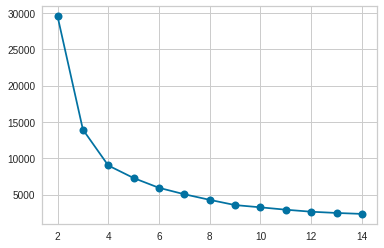

In [136]:
plt.plot(clusters, inertias, 'bo-', markersize=8)
plt.show()

In [137]:
from sklearn.metrics import silhouette_score

ss = []
for l in labels:
    ss.append(silhouette_score(data_copy, labels=l))

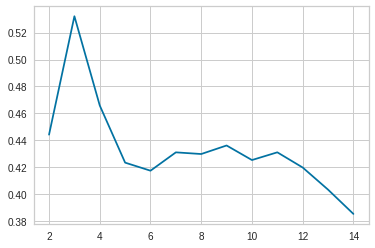

In [138]:
plt.plot(clusters,ss)

In [139]:
kmodelo = KMeans(n_clusters=7)
kmodelo.fit(data_copy)
centroide = kmodelo.cluster_centers_
centroide

array([[  19.16696779,  -98.51968326,    1.66857143],
       [  19.67928747,  -90.01157647,    1.70440252],
       [  29.3734628 , -110.30176434,    1.70873786],
       [  25.31665245, -103.56365838,    2.36480687],
       [  31.59499227, -115.20662469,    2.05882353],
       [  21.54068972, -101.80264276,    2.0261194 ],
       [  24.64584432, -109.07278654,    1.91139241]])

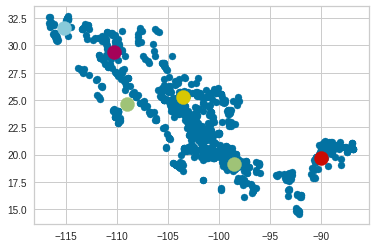

In [140]:
plt.scatter(data_copy.LONGITUD, data_copy.LATITUD)
for i in range(len(centroide)):    
    plt.scatter(centroide[i][1],centroide[i][0], label = i, s= 200)
plt.show()

In [141]:
data_copy
data_copy["COORDENADAS"] = list(zip(data_copy.LONGITUD, data_copy.LATITUD))
data_copy["COORDENADAS"] = data_copy["COORDENADAS"].apply(Point)
data_copy.head()

,LATITUD,LONGITUD,SEMAFORO,COORDENADAS
0,22.20887,-102.02210,1,POINT (-102.0221 22.20887)
1,21.99958,-102.20075,1,POINT (-102.20075 21.99958)
2,22.36685,-102.28801,3,POINT (-102.28801 22.36685)
3,22.18435,-102.29449,1,POINT (-102.29449 22.18435)
4,23.45138,-110.24480,3,POINT (-110.2448 23.45138)


,LATITUD,LONGITUD,SEMAFORO,COORDENADAS
0,22.20887,-102.02210,1,POINT (-102.02210 22.20887)
1,21.99958,-102.20075,1,POINT (-102.20075 21.99958)
2,22.36685,-102.28801,3,POINT (-102.28801 22.36685)
3,22.18435,-102.29449,1,POINT (-102.29449 22.18435)
4,23.45138,-110.24480,3,POINT (-110.24480 23.45138)
...,...,...,...,...
1063,24.76036,-99.54191,3,POINT (-99.54191 24.76036)
1064,24.78280,-99.70099,3,POINT (-99.70099 24.78280)
1065,25.55197,-99.82249,3,POINT (-99.82249 25.55197)
1066,24.80118,-100.32683,1,POINT (-100.32683 24.80118)


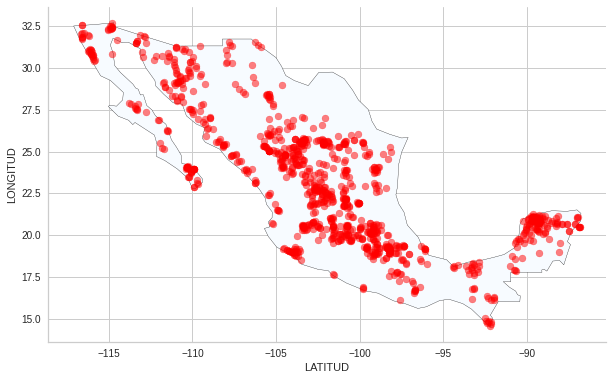

In [142]:
puntos = gpd.GeoDataFrame(data_copy, geometry="COORDENADAS")

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black', cmap='Blues')

gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

puntos .plot(ax=gax, color='red', alpha = 0.5)
puntos

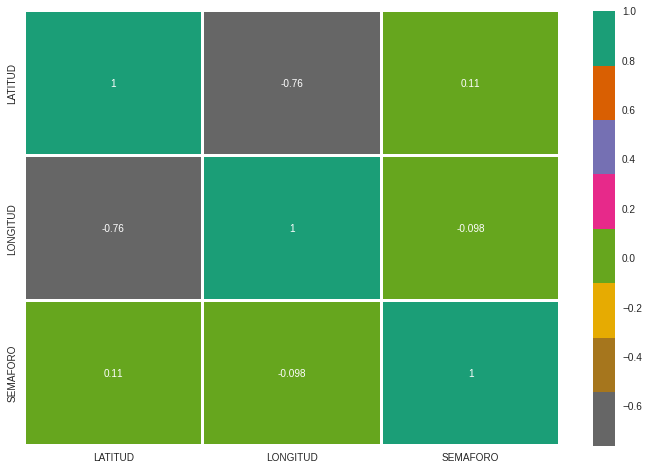

In [143]:
plt.figure(figsize=(12,8)) 
sns.heatmap(data_copy.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [144]:
categorias = preprocessing.LabelEncoder()
categorias.fit(data['SEMAFORO'])
categorias_name_mapping = dict(zip(categorias.classes_, categorias.transform(categorias.classes_)))
print(categorias_name_mapping)

# Encode labels in column 'species'.
data['SEMAFORO']= categorias.fit_transform(data['SEMAFORO'])
data['SEMAFORO'].unique

{'Amarillo': 0, 'Rojo': 1, 'Verde': 2}


<bound method Series.unique of 0       2
1       2
2       1
3       2
4       1
       ..
1063    1
1064    1
1065    1
1066    2
1067    2
Name: SEMAFORO, Length: 1068, dtype: int64>

In [145]:
Datos = data.select_dtypes(include=["float"])
X = Datos.columns 
X.shape

(5,)

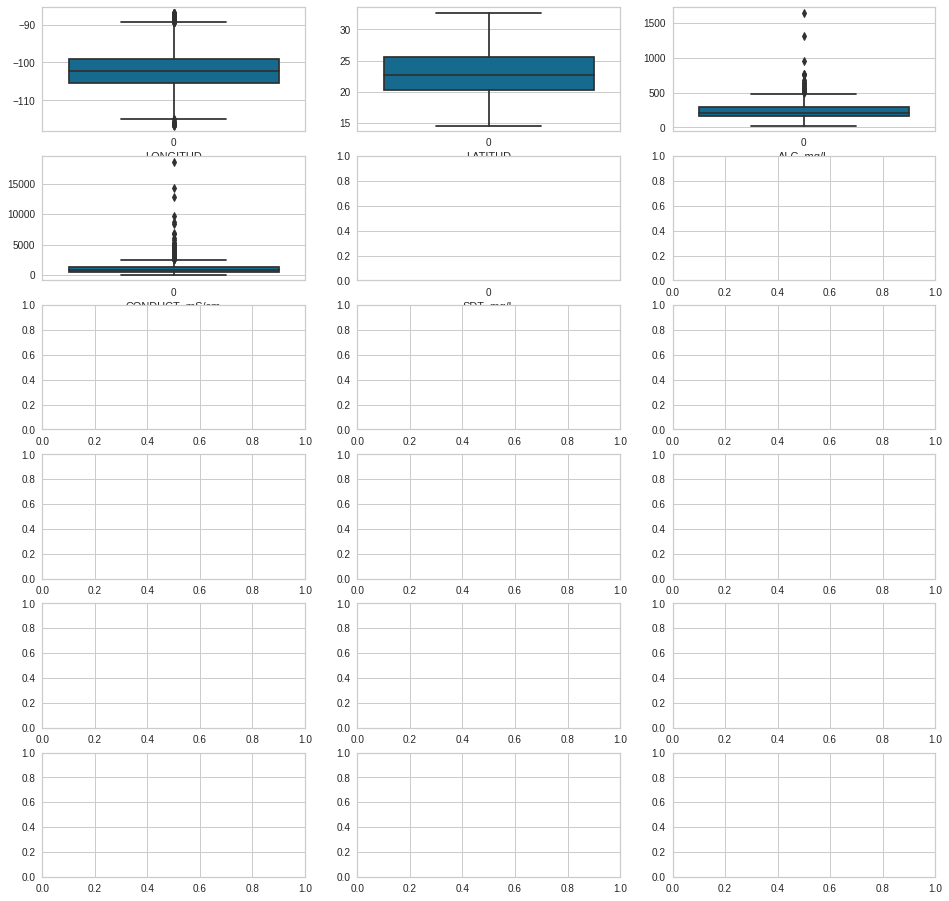

In [146]:
fig, axes = plt.subplots(6, 3, figsize=(16, 16))

for name, ax in zip(X, axes.flatten()):
    sns.boxplot(data=data[name], orient='v', ax=ax).set(xlabel=name)

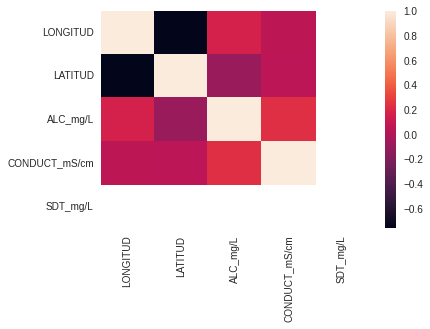

In [147]:
Relacion = Datos.corr()
sns.heatmap(Relacion)

 la zona norte es la que tiene mayor industria, y tiene mayor actividad agrícola puede ser que haya más desperdicio y se contamine con mayor facilidad el agua

In [148]:
df = df.drop(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO', 'ACUIFERO', 'SUBTIPO', 'PERIODO','CONTAMINANTES'], axis = 1)
df.head(3)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,-102.02210,22.20887,229.99,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.7320,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,-102.20075,21.99958,231.99,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.750110,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,-102.28801,22.36685,204.92,Alta,532.0,Buena para riego,342.0,Excelente para riego,Potable - Dulce,1.8045,Alta,120.7190,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI


In [149]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [150]:
import category_encoders as ce

In [151]:
dictionary_ALC = [{'col':'CALIDAD_ALC', 'mapping':{'Alta':1,'Media':2,'Baja':3,'Indeseable como FAAP':4}}]

In [152]:
enc = ce.OrdinalEncoder(cols = 'CALIDAD_ALC', mapping = dictionary_ALC )

In [153]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(df['SEMAFORO'], axis = 1), df['SEMAFORO'], test_size = 0.2, random_state = 2) 

In [154]:
x_train['CALIDAD_ALC'].value_counts()

(CALIDAD_ALC,)      
Alta                    637
Media                   156
Indeseable como FAAP     43
Baja                     18
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f91084dc810>,
      dtype=object)

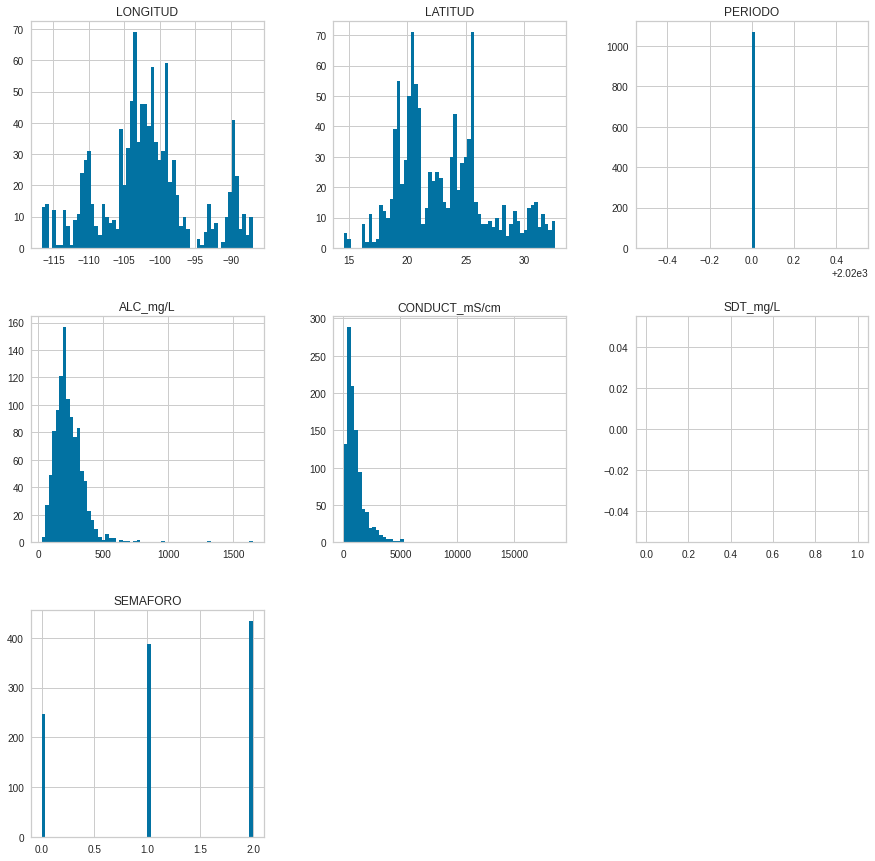

In [176]:
data.hist(bins = 60, figsize=(15,15))

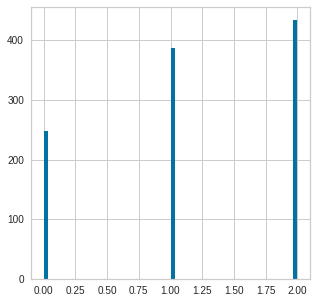

In [178]:
data['SEMAFORO'].hist(bins = 60, figsize=(5,5))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


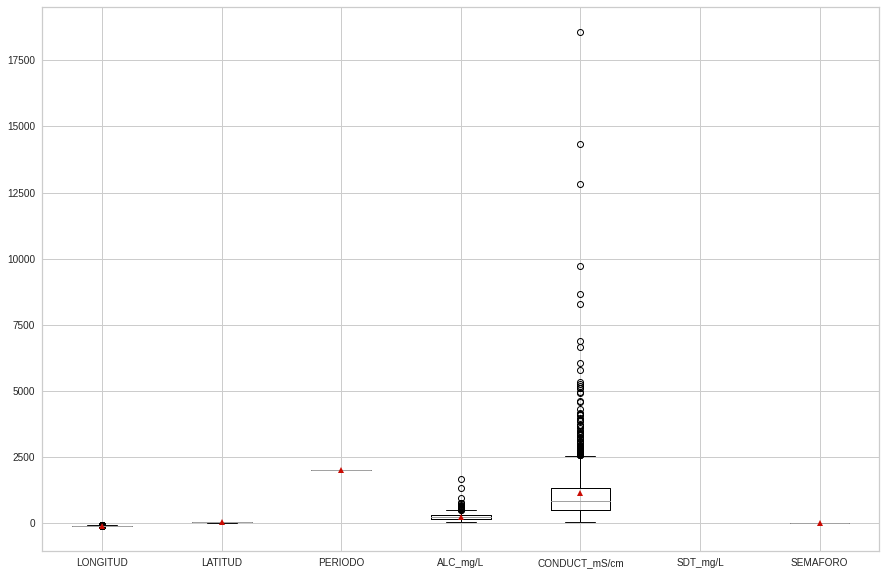

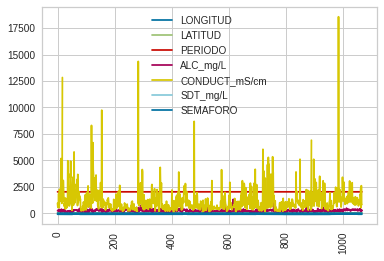

In [180]:
utliers = data.boxplot(figsize = (15,10),showmeans = True)
data.plot()
plt.xticks(rotation=90)
plt.show()

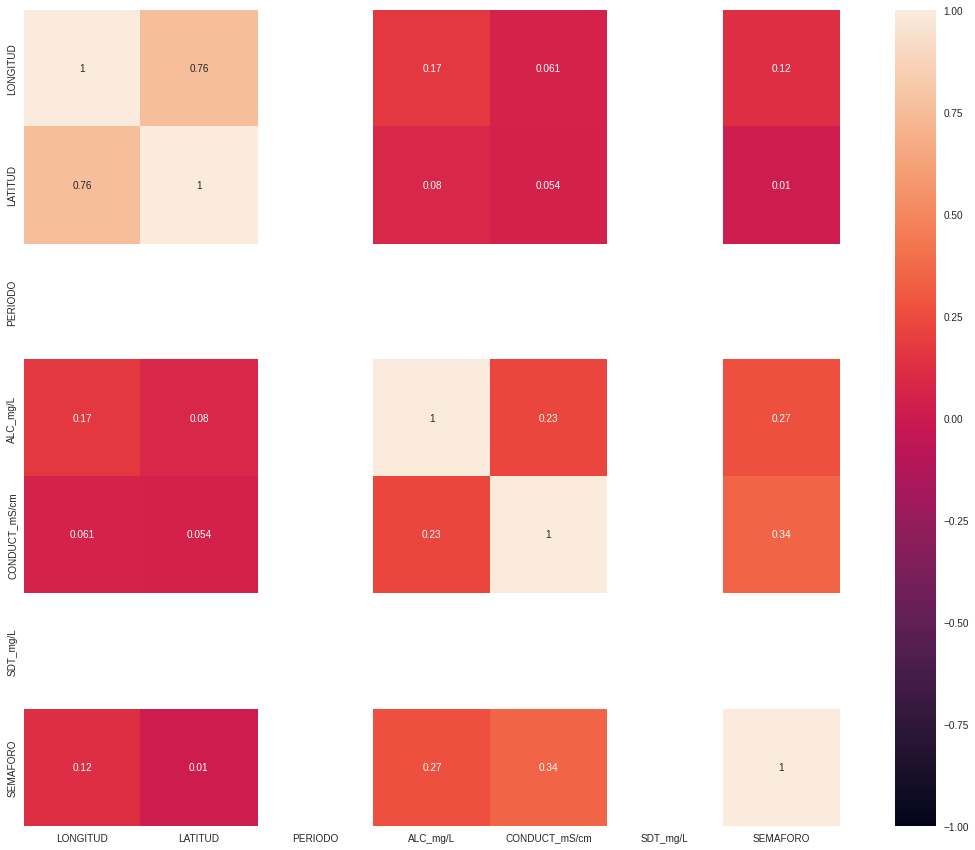

In [181]:
correlacion = data.corr().abs() 

f, ax = plt.subplots(figsize = (20,15))

sns.heatmap(correlacion, vmax = 1, vmin = -1, square = True, annot = True)

In [182]:
data["Coordinates"] = list(zip(data.LONGITUD, data.LATITUD))
data["Coordinates"] = data["Coordinates"].apply(Point)
data.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,2,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.0221 22.20887)
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,2,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.20075 21.99958)
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,1,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,POINT (-102.28801 22.36685)
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,2,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.29449 22.18435)
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,1,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,POINT (-110.2448 23.45138)


In [183]:
gdf = gpd.GeoDataFrame(data, geometry="Coordinates")
gdf.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,2,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.02210 22.20887)
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,2,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.20075 21.99958)
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,1,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,POINT (-102.28801 22.36685)
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,2,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.29449 22.18435)
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,1,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,POINT (-110.24480 23.45138)


In [184]:
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

In [186]:
Ultimo = data[["LONGITUD","LATITUD"]]
Ultimo

,LONGITUD,LATITUD
0,-102.02210,22.20887
1,-102.20075,21.99958
2,-102.28801,22.36685
3,-102.29449,22.18435
4,-110.24480,23.45138
...,...,...
1063,-99.54191,24.76036
1064,-99.70099,24.78280
1065,-99.82249,25.55197
1066,-100.32683,24.80118


In [188]:
X = Ultimo ["LONGITUD"]
y = Ultimo ["LATITUD"]

In [192]:
escalar = MinMaxScaler()
escalar.fit(Ultimo)
df_latlong = pd.DataFrame(escalar.transform(Ultimo))
df_latlong.columns = Ultimo.columns

k_range = range(1,10)
sse = []

for k in k_range:
  km  = KMeans(n_clusters= k)
  km.fit(df_latlong)
  sse.append(km.inertia_)

In [202]:
Modelo = KMeans(n_clusters=6, max_iter=1000, random_state=0)
pre= Modelo.fit_predict(df_latlong)

centro = pd.DataFrame(Modelo.cluster_centers_)
centro.columns = Ultimo.columns
centro


,LONGITUD,LATITUD
0,0.291255,0.606203
1,0.662719,0.204509
2,0.920268,0.325841
3,0.471000,0.568943
4,0.505817,0.352618
5,0.149674,0.872261


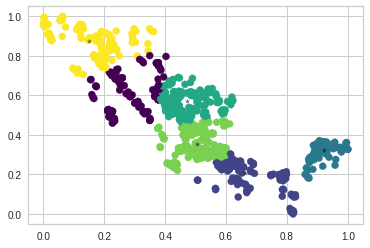

In [196]:
plt.scatter(df_latlong["LONGITUD"], df_latlong["LATITUD"], c=y_pred, s=50, cmap='viridis')
plt.scatter(centro["LONGITUD"], centro["LATITUD"], c='black',marker="*", s=20, alpha=.5);


In [199]:
coordenadas = pd.DataFrame(escalar.inverse_transform(centro))
coordenadas.columns = centro.columns
coordenadas
coordenadas = pd.DataFrame(escalar.inverse_transform(centro))
coordenadas.columns = centro.columns
coordenadas

,LONGITUD,LATITUD
0,-107.984806,25.543466
1,-96.915148,18.266147
2,-89.240131,20.464273
3,-102.628404,24.868437
4,-101.590827,20.949379
5,-112.203939,30.363517


In [203]:
pre = pd.DataFrame(pre)
pre.columns = ["Clusters"]
df0 = pre[pre.Clusters == 0]
df1 = pre[pre.Clusters == 1]
df2 = pre[pre.Clusters == 2]
df3 = pre[pre.Clusters == 3]
df4 = pre[pre.Clusters == 4]
df5 = pre[pre.Clusters == 5]

print("Cluster 0: "+ str(df0.shape))
print("Cluster 1: "+ str(df1.shape))
print("Cluster 2: "+ str(df2.shape))
print("Cluster 3: "+ str(df3.shape))
print("Cluster 4: "+ str(df4.shape))
print("Cluster 5: "+ str(df5.shape))

Cluster 0: (136, 1)
Cluster 1: (154, 1)
Cluster 2: (125, 1)
Cluster 3: (232, 1)
Cluster 4: (282, 1)
Cluster 5: (139, 1)


ValueError: ignored